<a href="https://colab.research.google.com/github/ym001/distancia/blob/master/notebook/imageDistance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install distancia==0.0.73

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.9 MB/s eta 0:00:00


In [2]:
from distancia import StructuralSimilarityIndex

def example(self):
        """
        Example usage with two small 3x3 grayscale images.
        """
        image1 = [
            [52, 55, 61],
            [54, 56, 62],
            [58, 59, 63]
        ]

        image2 = [
            [52, 54, 60],
            [53, 55, 61],
            [57, 58, 62]
        ]

        ssim_score = self.ssim(image1, image2)
        print(f"SSIM between example images: {ssim_score:.4f}")


# Example usage
ssim_calculator = StructuralSimilarityIndex()
ssim_calculator.example()


Le modèle FastText a été créé avec succès.
SSIM between example images: 0.9987


In [3]:
from distancia import PeakSignalToNoiseRatio


# Example usage
psnr_calculator = PeakSignalToNoiseRatio()
psnr_calculator.example()


Peak Signal-to-Noise Ratio (PSNR): 19.999999999999936


In [4]:
from distancia import HistogramIntersection

# Example usage
HistogramIntersection.example()


Histogram Intersection: 52


In [5]:
from distancia import EarthMoversDistance


# Example usage
emd_calculator = EarthMoversDistance()
emd_calculator.example()


Earth Mover's Distance between example histograms: 0.30000000000000004


In [6]:
from distancia import ChiSquareDistance


# Example usage
chi_square_calculator = ChiSquareDistance()
chi_square_calculator.example()


Chi-Square Distance between example histograms: 0.7150003334889615


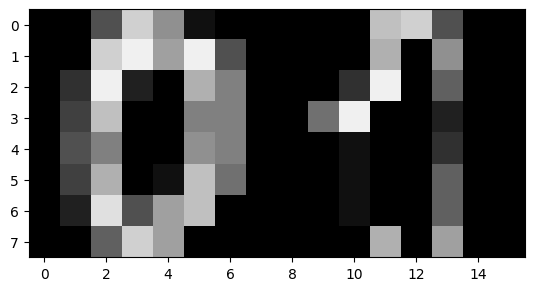

In [15]:

import cv2
import matplotlib.image as mpimg
from matplotlib.pyplot import imshow

from distancia import FeatureBasedDistance


from sklearn.datasets import load_digits

# Load dataset of images
digits = load_digits()
images = digits.images

# Convert the images to a format suitable for OpenCV (8-bit unsigned integers)
images = (images * 16).astype('uint8')  # digits dataset is in float, scale it to 0-255 range

# Select two images to compare (for example, the first and second)
image1 = images[0]
image2 = images[1]

# Instantiate the class with SIFT
feature_distance = FeatureBasedDistance(method="SIFT")

# Detect keypoints and descriptors
keypoints1, descriptors1 = feature_distance.detect_and_compute(image1)
keypoints2, descriptors2 = feature_distance.detect_and_compute(image2)

# Match descriptors
matches = feature_distance.match_keypoints(descriptors1, descriptors2)

# Draw the matches
image_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches, None)

imshow(image_matches)

#cv2_imshow(image_matches)
#cv2.waitKey(0)
#cv2.destroyAllWindows()



In [13]:
from distancia import PerceptualHashing
from PIL import Image

from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset (lightweight)
def load_cifar10_image(index: int) -> Image.Image:
    # Download the CIFAR-10 dataset
    (train_images, _), _ = cifar10.load_data()

    # Convert the image at the given index to a PIL Image
    image = Image.fromarray(train_images[index])

    return image

# Save the CIFAR-10 image as a temporary file
def save_image(image: Image.Image, filename: str) -> str:
    image.save(filename)
    return filename

# Example: Using CIFAR-10 images and computing pHash
def main():
    # Instantiate the PerceptualHashing class
    phash = PerceptualHashing(hash_size=32)

    # Load two images from the CIFAR-10 dataset
    image1 = load_cifar10_image(0)  # First image
    image2 = load_cifar10_image(1)  # Second image

    # Save the images to files
    image1_path = save_image(image1, 'image1.png')
    image2_path = save_image(image2, 'image2.png')

    # Compute pHash for both images
    hash1 = phash.compute_hash(image1_path)
    hash2 = phash.compute_hash(image2_path)

    # Calculate the Hamming distance between the two hashes
    distance = phash.hamming_distance(hash1, hash2)

    print(f"Hash 1: {hash1}")
    print(f"Hash 2: {hash2}")
    print(f"Hamming Distance: {distance}")

if __name__ == "__main__":
    main()



Hash 1: 97d7befd110a351b61756be286e29c669ed6b8ac9e6c471b626bab8837c79c71899c917735b8eba7c6f1c5384e6f8e19b1d43c6756e4ecf6af66a790c9b51e739132384f929b21c5acc5cf30f870622fa716cee34c670dd8b5f8308ec596ce73dd6f31b0d099b436d9a0e60e736259cdb6dcdc65e64b0e69aa9ad99a80f4e532
Hash 2: db3c922c9976d0556bd9ef62cccccdb7e5c174414636b0a62f66235cf2bd30c84ef0d9941d5f033e364ae691f9abc932a88506797038cff2299e7632e0d98eef37dadaa2e9cd6cd794c104c9266622e2f1929dc9cffe334d6260df198f8d7b29de2da90422408d901f2fe445dc2264a260c74a10213fa8644bb27336e0c0516b
Hamming Distance: 243


In [14]:
from distancia import NormalizedCrossCorrelation

# Example usage
def main():
    ncc = NormalizedCrossCorrelation()

    # Example images
    image1_path = 'image1.png'
    image2_path = 'image2.png'

    # Compute NCC between two images
    ncc_value: float = ncc.compute(image1_path, image2_path)
    print(f"Normalized Cross-Correlation (NCC): {ncc_value}")

if __name__ == "__main__":
    main()


Normalized Cross-Correlation (NCC): 0.13832136852006036
